In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Pune_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Alandi Road,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Ambegaon Budruk,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Anandnagar,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Aundh,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Aundh Road,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.groupby('area_type')['area_type'].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [4]:
df2 = df1.drop(['area_type','society','balcony','availability'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Alandi Road,2 BHK,1056,2.0,39.07
1,Ambegaon Budruk,4 Bedroom,2600,5.0,120.00
2,Anandnagar,3 BHK,1440,2.0,62.00
3,Aundh,3 BHK,1521,3.0,95.00
4,Aundh Road,2 BHK,1200,2.0,51.00


In [5]:
#data pre-processing
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [6]:
#drop all the na columns as we have larger dataset but smaller na values
df3 = df2.dropna()
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [7]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df3['bhk'] = df3['size'].apply(lambda x: x.split(' ')[0])
df3.head()

<ipython-input-8-d6391c5c432a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: x.split(' ')[0])


,location,size,total_sqft,bath,price,bhk
0,Alandi Road,2 BHK,1056,2.0,39.07,2
1,Ambegaon Budruk,4 Bedroom,2600,5.0,120.00,4
2,Anandnagar,3 BHK,1440,2.0,62.00,3
3,Aundh,3 BHK,1521,3.0,95.00,3
4,Aundh Road,2 BHK,1200,2.0,51.00,2


In [9]:
df3['bhk'].unique() #added new feature(integer)for bhk

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [10]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
#Explore total_sqft feature
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True
#will return the float values

In [12]:
df3[~df3['total_sqft'].apply(is_float)].head(10) # ~sihn will return all the false values in is_float function

,location,size,total_sqft,bath,price,bhk
30,Gultekdi,4 BHK,2100 - 2850,4.0,186.000,4
122,Ganeshkhind,4 BHK,3067 - 8156,4.0,477.000,4
137,Khadaki,2 BHK,1042 - 1105,2.0,54.005,2
165,Prabhat Road,2 BHK,1145 - 1340,2.0,43.490,2
188,Wakadewadi,2 BHK,1015 - 1540,2.0,56.800,2
410,Ganeshkhind,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Prabhat Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Raviwar Peth,9 Bedroom,4125Perch,9.0,265.000,9
661,Tilak Road,2 BHK,1120 - 1145,2.0,48.130,2
672,Alandi Road,4 Bedroom,3090 - 5002,4.0,445.000,4


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple


In [13]:
def convert_sqft_to_num(x):
  t = x.split('-')
  if len(t) == 2:
    return (float(t[0])+float(t[1]))/2
  try:
    return float(x)
  except:
    return None

In [14]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Alandi Road,2 BHK,1056.0,2.0,39.07,2
1,Ambegaon Budruk,4 Bedroom,2600.0,5.0,120.00,4
2,Anandnagar,3 BHK,1440.0,2.0,62.00,3
3,Aundh,3 BHK,1521.0,3.0,95.00,3
4,Aundh Road,2 BHK,1200.0,2.0,51.00,2


In [15]:
df4.loc[122]

,122
location,Ganeshkhind
size,4 BHK
total_sqft,5611.5
bath,4.0
price,477.0
bhk,4


In [16]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df4['total_sqft'] #find the price_per_sqft
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Alandi Road,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ambegaon Budruk,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Anandnagar,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Aundh,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Aundh Road,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [17]:
len(df5.location.unique())

97

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations



In [18]:
df5.location = df5.location.apply(lambda x : x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [19]:
location_stats

,location
location,
Alandi Road,139
Karve Nagar,139
Paud Road,139
Ganeshkhind,139
Parvati Darshan,139
...,...
Shukrawar Peth,136
Satara Road,136
Model colony,136


In [20]:
len(location_stats[location_stats>10])

96

In [21]:
len(location_stats)

97

In [22]:
len(location_stats[location_stats<=10])

1


Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [23]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
other,1


In [24]:
len(df5.location.unique())

97

In [25]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

97

In [26]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Alandi Road,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ambegaon Budruk,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Anandnagar,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Aundh,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Aundh Road,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Balaji Nagar,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Baner,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Baner road,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Bhandarkar Road,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Bhavani Peth,6 Bedroom,1020.0,6.0,370.00,6,36274.509804



Outlier Removal Using Business Logic:

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [27]:
df5['bhk'] = pd.to_numeric(df5['bhk'], errors='coerce') #convert bhk column to numeric type, replace invalid parsing with nan
df5 = df5.dropna() #drop the rows containing nan if there is any after the convertion
df5[df5.total_sqft/df5.bhk<300].head() #the problem was that bhk column was an string object and not float or integer type

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Bhavani Peth,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Kondhwa Budruk,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Mundhawa,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Pirangut,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Pune Railway Station,3 Bedroom,500.0,3.0,100.0,3,20000.000000



Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [28]:
df5.shape

(13200, 7)

In [29]:
df6 = df5[~(df5.total_sqft / df5.bhk<300)]
df6.shape

(12456, 7)

In [30]:
df6.price_per_sqft.describe()#will give some statistics on that particular column


,price_per_sqft
count,12456.000000
mean,6308.628922
std,4168.075333
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [31]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame() #created empty dataframe to store cleaned data
  for key, subdf in df.groupby('location'): #Groups the input DataFrame (df) by the location column and iterates over each group. key represent location name, subf is subset Dataframe
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft > (m - st))& (subdf.price_per_sqft <= (m+st))] #This helps remove extreme high or low values while keeping most of the data.
    df_out = pd.concat([df_out,reduced_df],ignore_index = True) #Appends the filtered data (reduced_df) to df_out while ignoring the index (to prevent duplicate indices).
  return df_out

In [32]:
df7 =  remove_pps_outliers(df6)
df7.shape

(10883, 7)

In [33]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)] # Contains only 2 BHK properties for the specified location.
  bhk3 = df[(df.location==location) & (df.bhk==3)] #Contains only 3 BHK properties for the specified location.
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price (Lakh Indian Rupees)")
  plt.title(location)
  plt.legend()

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

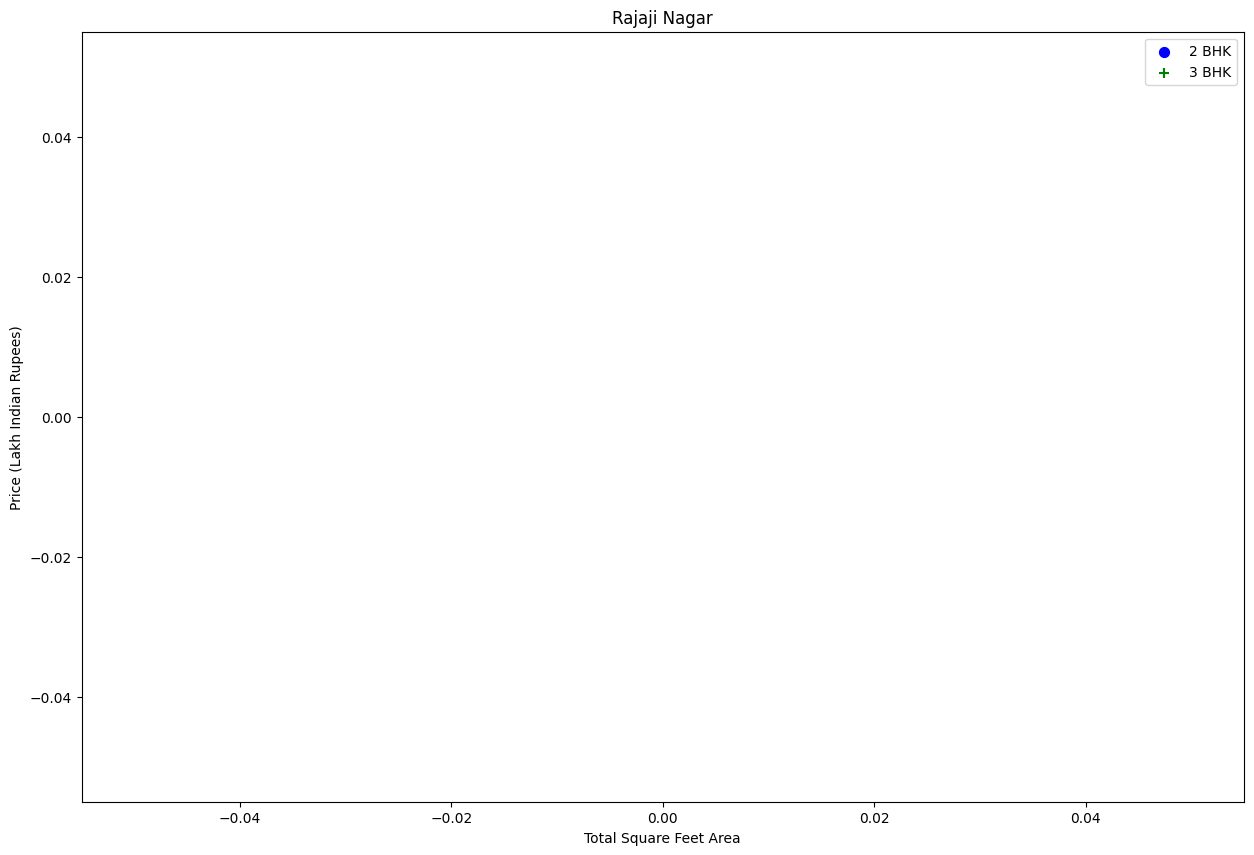

In [34]:
plot_scatter_chart(df7,"Rajaji Nagar")

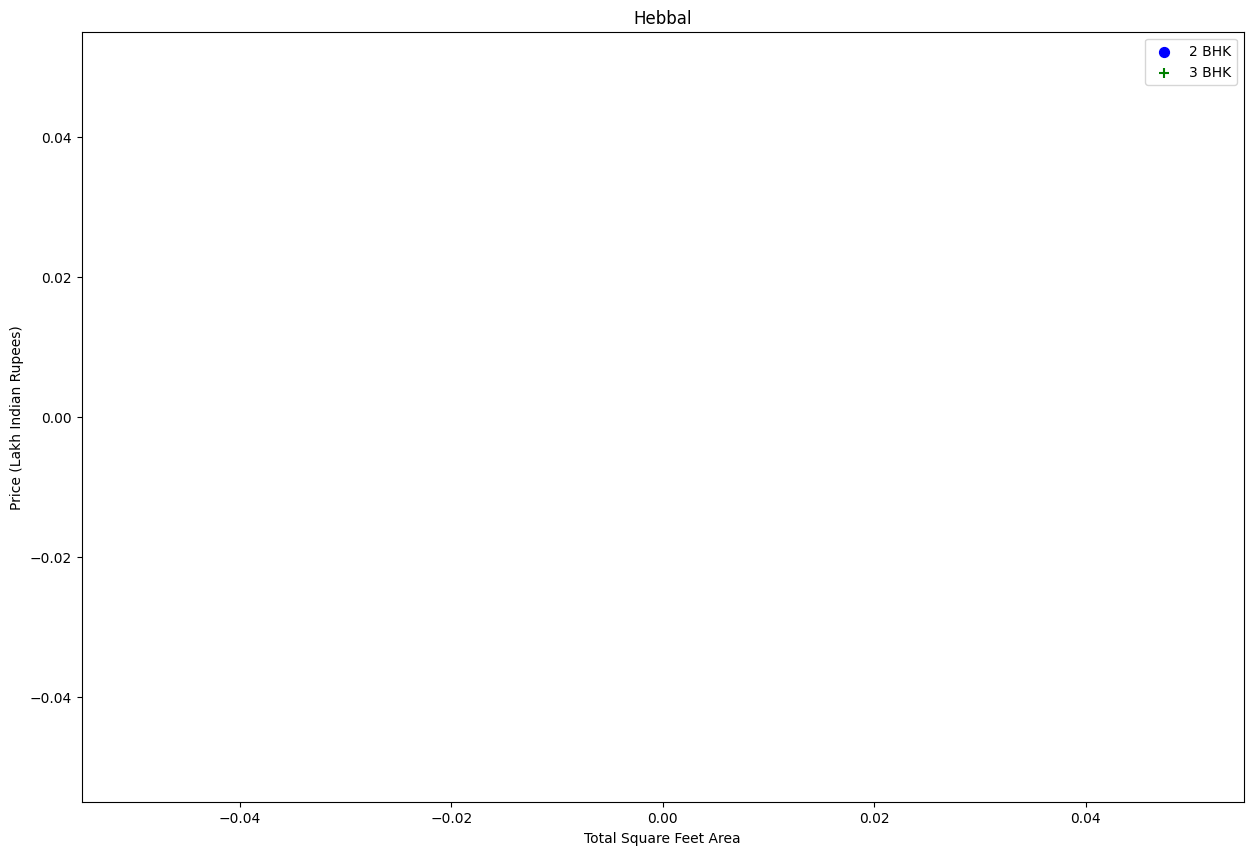

In [35]:
plot_scatter_chart(df7,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([]) #Creates an empty NumPy array (exclude_indices) to store the indices of outliers that should be removed from the dataset.
    for location, location_df in df.groupby('location'): #Groups the DataFrame by location and iterates through each location's subset (location_df).
        bhk_stats = {} #Creates an empty dictionary (bhk_stats) to store statistical values (mean, std, count) of price_per_sqft for each BHK type.
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0] #Stores statistics (mean, std, and count) for each BHK in the bhk_stats dictionary:
            }
        for bhk, bhk_df in location_df.groupby('bhk'): #Loops through the BHK groups again to compare prices of higher BHKs with their lower counterparts.
            stats = bhk_stats.get(bhk-1) #This is done to compare 3 BHK prices with 2 BHK prices
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values) #Finds indices of properties where price_per_sqft is lower than the average (mean) of the lower BHK category.
    return df.drop(exclude_indices,axis='index') #Removes outlier rows from the original DataFrame using the collected exclude_indices
df8 = remove_bhk_outliers(df7)
df8.shape

(7543, 7)

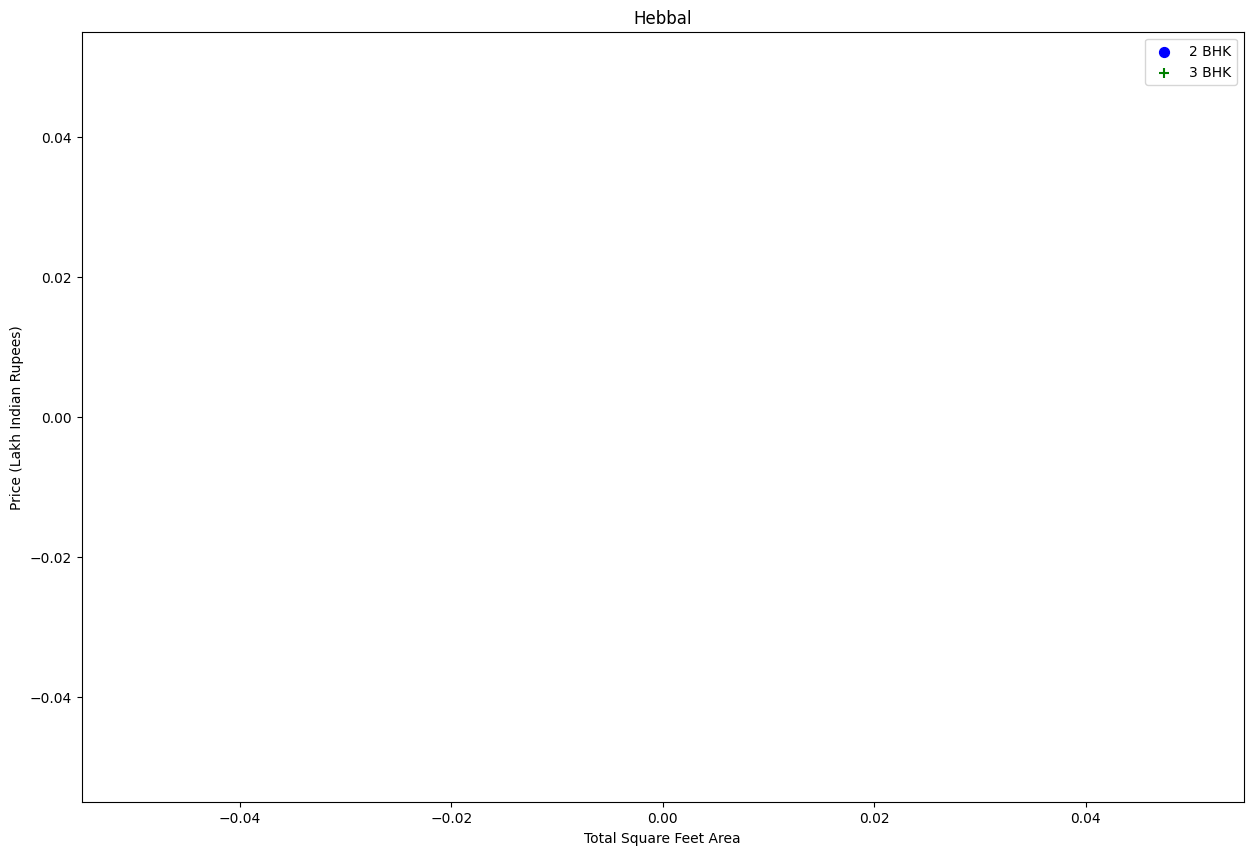

In [37]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

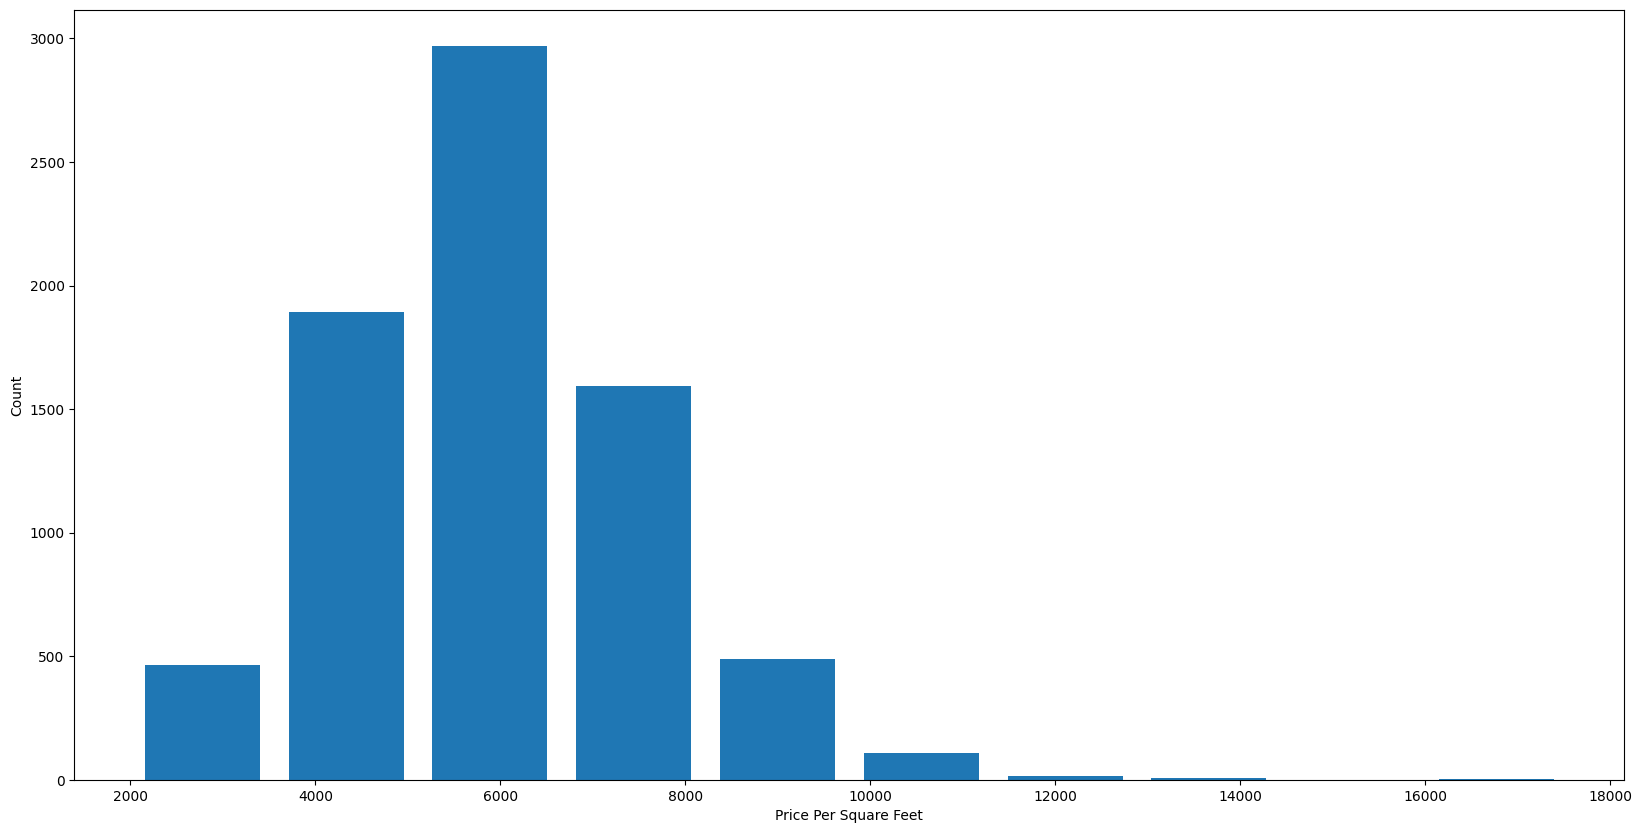

In [38]:
#plot histogram
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft , rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [39]:
# explore bathroom features
df8.bath.unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

In [40]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1211,Bibvewadi,11 BHK,6000.0,12.0,150.0,11,2500.000000
2637,Fatima Nagar,10 BHK,12000.0,12.0,525.0,10,4375.000000
5265,Kondhwa Khurd,13 BHK,5425.0,13.0,275.0,13,5069.124424
6350,Model colony,16 BHK,10000.0,16.0,550.0,16,5500.000000
10389,Wagholi,10 BHK,4000.0,12.0,160.0,10,4000.000000



It is unusual to have 2 more bathrooms than number of bedrooms in a home



In [41]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
772,Baner,3 BHK,1806.0,6.0,116.0,3,6423.034330
3067,Ghorpade Peth,6 BHK,11338.0,9.0,1000.0,6,8819.897689
4231,Karve Nagar,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


Text(0, 0.5, 'Count')

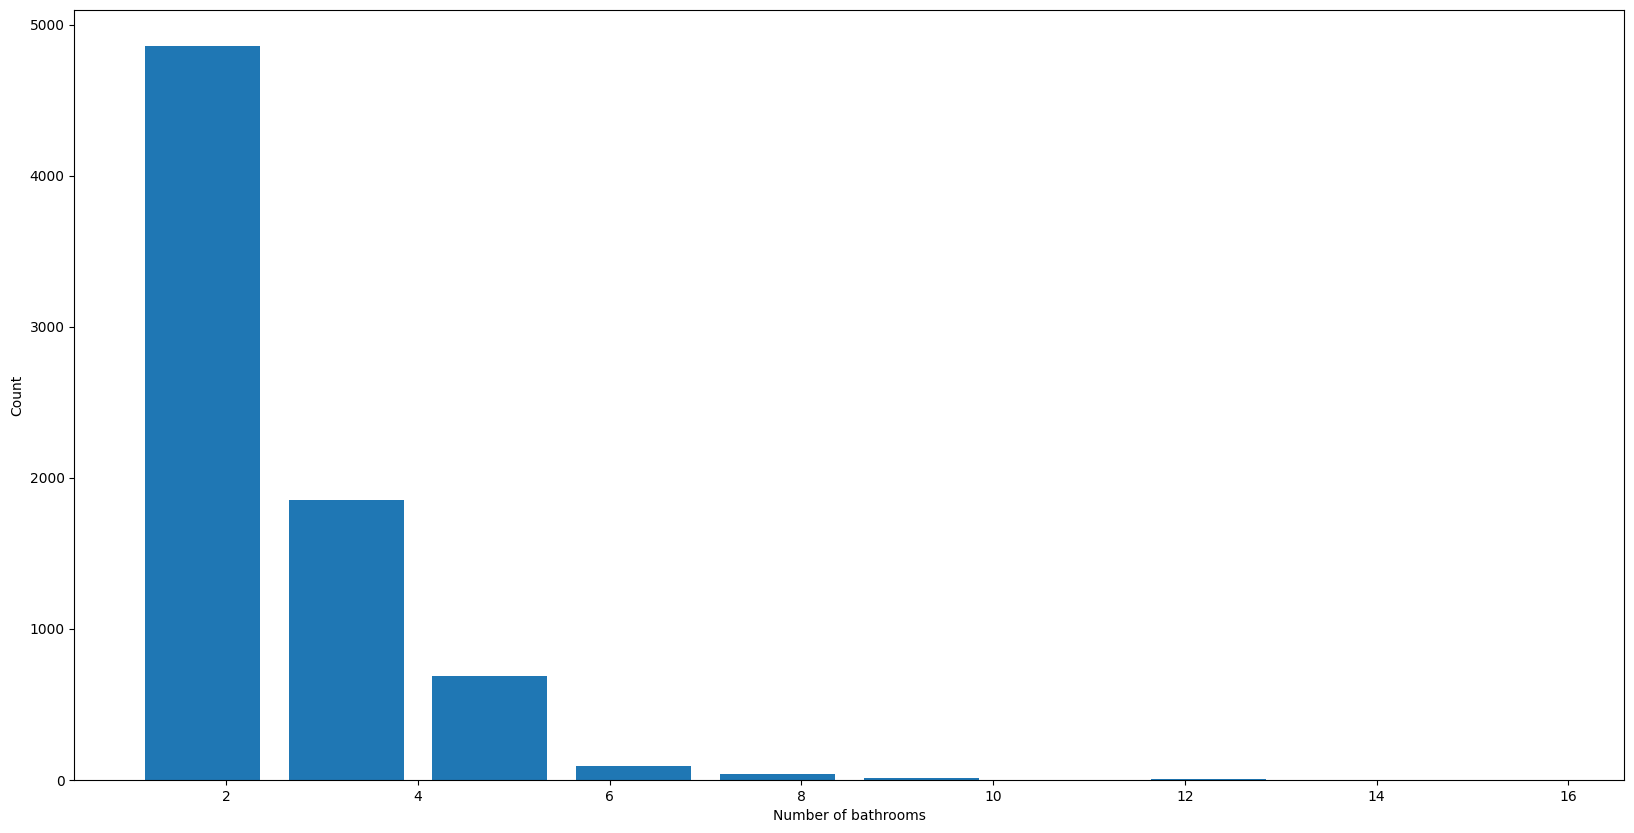

In [42]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [43]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7479, 7)

In [44]:
df10 = df9.drop(['size','price_per_sqft'],axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,Alandi Road,1056.0,2.0,39.07,2
1,Alandi Road,2894.0,4.0,245.00,4
2,Alandi Road,1084.0,2.0,50.00,2
3,Alandi Road,1230.0,2.0,80.00,2
4,Alandi Road,1750.0,3.0,130.00,3


In [49]:
# ready for model training
# Use One Hot Encoding For location
dummies = pd.get_dummies(df10.location).astype(int)
# Check if 'other' column exists before dropping
if 'other' in dummies.columns:
    dummies = dummies.drop('other', axis='columns')  # Only drop if 'other' exists
df11 = pd.concat([df10, dummies], axis='columns')  # Concatenate

In [51]:
df11.head()

,location,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,Alandi Road,1056.0,2.0,39.07,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alandi Road,2894.0,4.0,245.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alandi Road,1084.0,2.0,50.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alandi Road,1230.0,2.0,80.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alandi Road,1750.0,3.0,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df12 = df11.drop('location', axis ='columns')
df12.head()

,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,80.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,130.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df12.shape

(7479, 100)

In [54]:
X = df12.drop(['price'], axis = 'columns')
X.head()

,total_sqft,bath,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y = df12.price
y.head()

,price
0,39.07
1,245.00
2,50.00
3,80.00
4,130.00


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)

In [57]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.8234642712561867

# **Use K Fold cross validation to measure accuracy of our LinearRegression model**


In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(),X,y,cv = cv)

array([0.87729294, 0.87158074, 0.82825079, 0.89763339, 0.81068616])

Find best model using **GridSearchCV**

In [59]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': make_pipeline(StandardScaler(), LinearRegression()), # Use a pipeline to normalize data
            'params': {
                'linearregression__fit_intercept': [True, False], # Parameters for LinearRegression
                'linearregression__copy_X': [True, False]  # Parameters for LinearRegression
                # Add other parameters for LinearRegression as needed
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

,model,best_score,best_params
0,linear_regression,0.857089,"{'linearregression__copy_X': True, 'linearregr..."
1,lasso,0.857851,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.747301,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [63]:
 def predict_price(location,sqft,bath,bhk):
  loc_index = np.where(X.columns == location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if loc_index >= 0:
    x[loc_index] = 1
  return reg.predict([x])[0]

:

In [64]:
predict_price('Alandi Road',1000 ,2 ,2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


52.65844611968812

In [65]:
predict_price('Baner',2800, 4, 4)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.00917683140597

**Export the tested model to a pickle file**

In [66]:
import pickle
with open('pune_home_prices_model.pickle','wb') as f:
  pickle.dump(reg , f)

Export location and column information to a file that will be useful later on in our prediction application

In [67]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))